In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load X and Y from the keras mnist datasets
(XTrain,YTrain),(XTest,YTest)=keras.datasets.mnist.load_data()

In [3]:
XTrain.shape

(60000, 28, 28)

In [4]:
XTest.shape

(10000, 28, 28)

In [5]:
YTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
YTrain.shape

(60000,)

In [7]:
YTest.shape

(10000,)

In [8]:
YTrain[0]

5

In [9]:
# feature scaling to improve accuracy
XTrain=XTrain/255
XTest=XTest/255

In [10]:
# flatten the images into an array
XTrainflat=XTrain.reshape(len(XTrain),28*28)
XTestflat=XTest.reshape(len(XTest),28*28)

In [11]:
XTrainflat.shape

(60000, 784)

In [12]:
# creating a neural network
# a stack of layers 
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(XTrainflat,YTrain,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4649 - accuracy: 0.8801
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9257


In [13]:
model.evaluate(XTestflat,YTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9245


[0.2696095407009125, 0.9244999885559082]

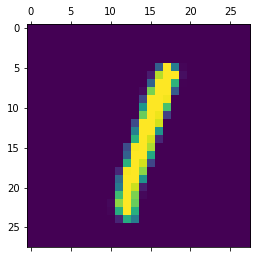

In [14]:
plt.matshow(XTest[5])

In [15]:
# predict on Test values
YPred=model.predict(XTestflat)
YPred[5]

313/313 [==============================] - 1s 1ms/step


array([3.90470777e-05, 9.97897804e-01, 4.51407343e-01, 3.53717089e-01,
       1.17651895e-02, 1.77195929e-02, 8.27147719e-03, 5.88840067e-01,
       5.50238192e-01, 1.66667029e-01], dtype=float32)

In [16]:
np.argmax(YPred[10])

0

In [17]:
YPred_labels=[np.argmax(i) for i in YPred]
YPred_labels[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 6]

In [18]:
confmatrix=tf.math.confusion_matrix(labels=YTest,predictions=YPred_labels)
confmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    6,    7,    2,    3,    1],
       [   0, 1106,    3,    2,    1,    1,    4,    2,   16,    0],
       [   4,    9,  916,   12,   12,    4,   13,    9,   49,    4],
       [   3,    0,   18,  914,    2,   21,    2,   10,   29,   11],
       [   1,    1,    2,    1,  926,    0,   10,    3,    9,   29],
       [   9,    3,    1,   38,   11,  752,   16,    7,   47,    8],
       [   9,    3,    4,    1,    8,   11,  916,    2,    4,    0],
       [   1,    5,   22,    4,   11,    0,    0,  942,    3,   40],
       [   4,    7,    5,   14,    9,   16,   10,   11,  888,   10],
       [   9,    6,    1,    8,   30,    3,    0,   12,   12,  928]])>

Text(69.0, 0.5, 'Actual Value')

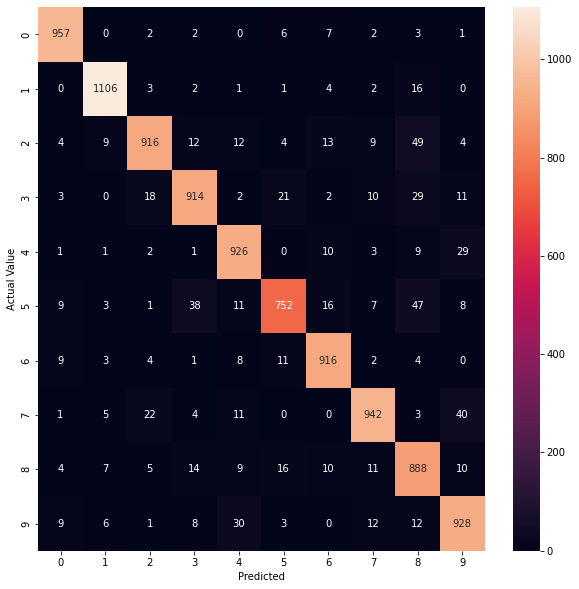

In [19]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(confmatrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Actual Value")